In [1]:
import praw
import pandas as pd
import datetime as dt

import os
#os.chdir('data')

In [ ]:
%pwd

In [113]:
import yfinance as yf
nvda = yf.Ticker("NVDA")
aapl = yf.Ticker("AAPL")
nv_statistics = nvda.history(period="6mo")
ap_statistics = aapl.history(period="6mo")

nv_statistics

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-23 00:00:00-04:00,104.506845,104.786816,102.007159,102.697075,247526000,0.0,0.0
2025-04-24 00:00:00-04:00,103.466977,106.526590,103.097021,106.416603,220815000,0.0,0.0
2025-04-25 00:00:00-04:00,106.836560,111.905922,105.716706,110.996040,251064700,0.0,0.0
2025-04-28 00:00:00-04:00,109.676194,110.356109,106.006651,108.716316,207708500,0.0,0.0
2025-04-29 00:00:00-04:00,107.656450,110.186131,107.426484,109.006279,170444300,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-16 00:00:00-04:00,182.229996,183.279999,179.770004,181.809998,179723300,0.0,0.0
2025-10-17 00:00:00-04:00,180.179993,184.100006,179.750000,183.220001,173135200,0.0,0.0
2025-10-20 00:00:00-04:00,183.130005,185.199997,181.729996,182.639999,128544700,0.0,0.0


In [114]:
ap_statistics

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-23 00:00:00-04:00,205.496994,207.492110,202.304810,204.100418,52929200,0.0,0.0
2025-04-24 00:00:00-04:00,204.389708,208.320090,202.444472,207.861206,47311000,0.0,0.0
2025-04-25 00:00:00-04:00,205.866084,209.237836,205.696501,208.768982,38222300,0.0,0.0
2025-04-28 00:00:00-04:00,209.487235,210.983572,206.953443,209.626892,38743100,0.0,0.0
2025-04-29 00:00:00-04:00,208.180439,211.721774,207.861213,210.694290,36827600,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-16 00:00:00-04:00,248.250000,249.039993,245.130005,247.449997,39777000,0.0,0.0
2025-10-17 00:00:00-04:00,248.020004,253.380005,247.270004,252.289993,49147000,0.0,0.0
2025-10-20 00:00:00-04:00,255.889999,264.380005,255.630005,262.239990,90483000,0.0,0.0


In [115]:
amzn = yf.Ticker("AMZN")
microsoft = yf.Ticker("MSFT")
am_statistics = amzn.history(period="6mo")
mi_statistics = microsoft.history(period="6mo")

am_statistics

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-23 00:00:00-04:00,183.449997,187.380005,180.190002,180.600006,63470100,0.0,0.0
2025-04-24 00:00:00-04:00,180.919998,186.740005,180.179993,186.539993,43763200,0.0,0.0
2025-04-25 00:00:00-04:00,187.619995,189.940002,185.490005,188.990005,36414300,0.0,0.0
2025-04-28 00:00:00-04:00,190.110001,190.220001,184.889999,187.699997,33224700,0.0,0.0
2025-04-29 00:00:00-04:00,183.990005,188.020004,183.679993,187.389999,41667300,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-16 00:00:00-04:00,215.669998,218.589996,212.809998,214.470001,42414600,0.0,0.0
2025-10-17 00:00:00-04:00,214.559998,214.800003,211.029999,213.039993,45986900,0.0,0.0
2025-10-20 00:00:00-04:00,213.880005,216.690002,213.589996,216.479996,38882800,0.0,0.0


In [116]:
mi_statistics

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-23 00:00:00-04:00,374.754794,379.069782,371.725336,373.090607,20545500,0.0,0.0
2025-04-24 00:00:00-04:00,374.396065,387.101813,373.887825,385.955780,22232300,0.0,0.0
2025-04-25 00:00:00-04:00,385.656847,390.798942,383.265183,390.490021,18973200,0.0,0.0
2025-04-28 00:00:00-04:00,390.599610,391.376902,385.298097,389.802399,16579400,0.0,0.0
2025-04-29 00:00:00-04:00,389.941913,393.728743,389.025123,392.672424,14974000,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-16 00:00:00-04:00,512.580017,516.849976,508.130005,511.609985,15559600,0.0,0.0
2025-10-17 00:00:00-04:00,509.040009,515.479980,507.309998,513.580017,19867800,0.0,0.0
2025-10-20 00:00:00-04:00,514.609985,518.700012,513.429993,516.789978,14665600,0.0,0.0


In [7]:
os.path.exists("keys.env")

True

In [8]:
from dotenv import load_dotenv

# Load .env file (or keys.env)
load_dotenv("keys.env")

reddit_id = os.getenv("REDDIT_ID")
reddit_secret = os.getenv("REDDIT_SECRET")


#or: use "os.environ['REDDIT_ID'] , os.environ['REDDIT_SECRET']"
print("REDDIT_ID loaded:", bool(reddit_id))

REDDIT_ID loaded: True


In [11]:
reddit = praw.Reddit(
    client_id= reddit_id, 
    client_secret= reddit_secret,
    username= 'ebeneezer_08',
    user_agent= 'StockSentimentalAnalysis/1.0 by u/ebeneezer_08'
)

# Accessing a subreddit to fetch posts
subreddit = reddit.subreddit('NvidiaStock')
for post in subreddit.hot(limit=10):
    print(post.title)

Thanks to Nvidia, I was able to upgrade to drinking green tea instead of plain water everyday
NVDA didn't get cooked but most of the AI industry did
I’m sad
Thanks to Nvidia I was able to eat dessert everyday instead of drinking plain water
Fkn Trump you gotta be fisting me
Just backed up my truck again folks!!  Great sales on NVDA!!
NVDA AMD AVGO
Nvidia Stock Analysis for October
December 2025 Price Forecast
We're gonna end the week green folks 💚!! I can feel it!!


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from datetime import datetime, timezone, timedelta
from pytz import timezone as tz

#### Re-run range for different subreddits/companies begin

In [14]:
def is_within_time_range(post_time, start_hour, end_hour):
    post_time_et = post_time.astimezone(tz('US/Eastern'))
    if (post_time_et.hour >= 0) & (post_time_et.hour < 12):
       start_time = post_time_et.replace(hour=start_hour, minute=0, second=0, microsecond=0) - timedelta(days=1)
       end_time = post_time_et.replace(hour=end_hour, minute=0, second=0, microsecond=0)
    else:
       start_time = post_time_et.replace(hour=start_hour, minute=0, second=0, microsecond=0)
       end_time = post_time_et.replace(hour=end_hour, minute=0, second=0, microsecond=0) + timedelta(days=1)

    return start_time <= post_time_et <= end_time

def fetch_relevant_posts(reddit, subreddit_name, start_date, end_date, start_hour, end_hour):
    subreddit = reddit.subreddit(subreddit_name)
    relevant_posts_title = []
    relevant_posts_body = []
    relevant_posts_time = []
    revelant_comments_text = []
    relevant_comments_time = []

    excluded_keywords = ["help", "question", "advice"]
    question_keywords = ['What', 'How', 'what', 'how', 'help', 'question', 'advice', '?', 'newbie']
    included_keywords = ['bullish', 'bull', 'bear', 'bearish', 'bulls', 'bears', 'good', 'earnings', 'bad', 'green', 'red',
                         'dividends', 'report', 'buy', 'sell','buying', 'selling', 'hold', 'yield','$', 'steady', 'stable', 
                         'rising', 'falling', 'react', 'invest', 'profit', 'income', 'revenue', 'price', 'target', 'value', 
                         'shares', 'overheating', 'CEO', 'ceo', 'CTO', 'cto', 'CFO', 'cfo', 'short', 'long', 'news']

    for submission in subreddit.new(limit=None):
        post_time = datetime.fromtimestamp(submission.created_utc, tz=timezone.utc)
        if start_date <= post_time <= end_date:
            if (is_within_time_range(post_time, start_hour, end_hour)): # and (submission.author and submission.author.name == 'Mysterious-Green-432'):  #change this author name for different subreddit
                # if not any(keyword in submission.title.lower() for keyword in excluded_keywords) and \
                   # not any(keyword in submission.selftext.lower() for keyword in excluded_keywords) and \
                   # any(keyword in submission.selftext.lower() for keyword in included_keywords):
                    relevant_posts_title.append(submission.title)
                    relevant_posts_body.append(submission.selftext)
                    relevant_posts_time.append(post_time)
                    
                # if any(keyword in submission.title.lower() for keyword in question_keywords):
                    submission.comments.replace_more(limit=0)  # Replace "more comments" links with actual comments
                    for comment in submission.comments.list():
                        # Filter comments based on keywords criteria
                        if any(keyword in comment.body.lower() for keyword in included_keywords):
                          revelant_comments_text.append(comment.body)
                          relevant_comments_time.append(datetime.fromtimestamp(comment.created_utc, tz=timezone.utc))
                    
    return relevant_posts_title, relevant_posts_body, relevant_posts_time, revelant_comments_text, relevant_comments_time


In [15]:
start_date = datetime(2025, 6, 1, tzinfo=timezone.utc)  # start of range
end_date = datetime(2025, 10, 19, tzinfo=timezone.utc)    # end of range

post_titles, post_bodies, post_time, comment_text, comment_time = fetch_relevant_posts(reddit, 'AAPL', start_date, end_date, 17, 12) #change subreddit name every time

In [16]:
posts = pd.DataFrame()
comments = pd.DataFrame()
posts['title'] = post_titles
posts['body'] = post_bodies
posts['time'] = post_time
comments['text'] = comment_text
comments['time'] = comment_time
posts.set_index('time', inplace=True)
comments.set_index('time', inplace=True)
type(posts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
posts.head()

,title,body
time,,
2025-10-17 22:31:06+00:00,Apple Said to Cut iPhone Air Production Amid U...,>!What a joke another failure like Vision pro ...
2025-10-17 15:38:39+00:00,Apple Inks Formula 1 Rights Deal,
2025-10-16 08:37:45+00:00,Apple’s 14-inch MacBook Pro leaps forward with...,The new 14-inch MacBook Pro introduces Apple’s...
2025-10-16 02:01:12+00:00,My AAPL directional trade setup for tomorrow- ...,
2025-10-15 22:52:33+00:00,Apple Vision Pro M5 Heavier M5 Vision Pro weig...,Still $3500 +TAX for foolish fanboys


In [18]:
posts.index = (posts.index + timedelta(hours=8)).strftime('%Y-%m-%d')
comments.index = (comments.index + timedelta(hours=8)).strftime('%Y-%m-%d')

In [19]:
posts.index = pd.to_datetime(posts.index)
comments.index = pd.to_datetime(comments.index)

In [20]:
print(posts.shape)
print(comments.shape)

(183, 2)
(1210, 1)


In [21]:
posts.to_csv('apple_posts.csv')
comments.to_csv('apple_comments.csv')

#### Re-run range finished

Guide to use VADER: https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
# Step 1: Download the VADER lexicon
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download() #Select "vader_lexicon"



# nltk.download('vader_lexicon')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


"\nnltk.download('vader_lexicon')\n"

In [34]:
# Step 2: Initialize VADER sentiment analyzer
'''
Now that we have Vader installed, we can use it for sentiment analysis.
To use Vader, we need to import the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module.

'''
analyzer = SentimentIntensityAnalyzer()

In [73]:
def make_sentimentDF(posts_csv, comments_csv):
    stock_posts = pd.read_csv(posts_csv)
    stock_comments = pd.read_csv(comments_csv)

    stock_posts.index = pd.to_datetime(stock_posts['time'])
    stock_comments.index = pd.to_datetime(stock_comments['time'])

    # Step 3: Analyze the sentiment of each tweet and add sentiment score to the DataFrame
    stock_posts['post title sentiment_score'] = stock_posts['title'].apply(lambda post: analyzer.polarity_scores(post)['compound'] if not pd.isna(post) else 0)
    stock_posts['post body sentiment_score'] = stock_posts['body'].apply(lambda post: analyzer.polarity_scores(post)['compound'] if not pd.isna(post) else  0)
    stock_comments['comment sentiment_score'] = stock_comments['text'].apply(lambda comment: analyzer.polarity_scores(comment)['compound'] if not pd.isna(comment) else 0)

    stock_posts_cleaned = stock_posts.groupby(stock_posts.index).agg({'post title sentiment_score': 'mean', 'post body sentiment_score': 'mean'})
    stock_comments_cleaned = stock_comments.groupby(stock_comments.index).agg({'comment sentiment_score': 'mean'})

    stock_sentiment = pd.merge(stock_posts_cleaned, stock_comments_cleaned, left_index=True, right_index=True)

    return stock_posts, stock_comments, stock_posts_cleaned, stock_comments_cleaned, stock_sentiment

In [74]:
apple_posts, apple_comments, apple_posts_cleaned, apple_comments_cleaned, apple_sentiment = make_sentimentDF('apple_posts.csv', 'apple_comments.csv')
apple_posts_cleaned

,post title sentiment_score,post body sentiment_score
time,,
2025-06-02,0.0000,0.000000
2025-06-04,0.8860,0.991500
2025-06-07,-0.5267,0.000000
2025-06-08,0.0000,0.556300
2025-06-10,-0.2562,0.487567
...,...,...
2025-10-14,0.1672,0.301025
2025-10-15,0.1991,0.239450
2025-10-16,0.3381,0.219767


In [75]:
apple_comments_cleaned

,comment sentiment_score
time,
2025-06-04,0.698600
2025-06-05,0.311550
2025-06-07,0.298486
2025-06-08,0.326240
2025-06-09,0.716500
...,...
2025-10-17,0.416286
2025-10-18,0.355610
2025-10-19,0.440400


In [76]:
apple_posts

,time,title,body,post title sentiment_score,post body sentiment_score
time,,,,,
2025-10-18,2025-10-18,Apple Said to Cut iPhone Air Production Amid U...,>!What a joke another failure like Vision pro ...,-0.2732,0.4559
2025-10-17,2025-10-17,Apple Inks Formula 1 Rights Deal,NaN,0.0000,0.0000
2025-10-16,2025-10-16,Apple’s 14-inch MacBook Pro leaps forward with...,The new 14-inch MacBook Pro introduces Apple’s...,0.4019,0.9325
2025-10-16,2025-10-16,My AAPL directional trade setup for tomorrow- ...,NaN,0.0000,0.0000
2025-10-16,2025-10-16,Apple Vision Pro M5 Heavier M5 Vision Pro weig...,Still $3500 +TAX for foolish fanboys,0.6124,-0.2732
...,...,...,...,...,...
2025-06-10,2025-06-10,Sold.,It's been real. Bought goog for the long haul....,0.0000,0.5423
2025-06-08,2025-06-08,NVDA did it so will AAPL,Very interesting positioning into next week. \...,0.0000,0.5563
2025-06-07,2025-06-07,Apple stock is set up to be a long term loser,NaN,-0.5267,0.0000


In [77]:
apple_comments

,time,text,comment sentiment_score
time,,,
2025-10-18,2025-10-18,https://www.macrumors.com/2025/10/17/iphone-ai...,0.9081
2025-10-19,2025-10-19,It’s all good I see tons of 17 Pro out there i...,0.4404
2025-10-18,2025-10-18,Bahahaha. Show your short position.,0.0000
2025-10-16,2025-10-16,it depends if the ai siri flops or not. if it'...,-0.3430
2025-10-16,2025-10-16,I don´t see any reasons that AAPL could break ...,0.8573
...,...,...,...
2025-06-05,2025-06-05,AAPL tank on news that AI rollout in China has...,-0.2263
2025-06-05,2025-06-05,"It's a keeper, but the next 10 years do not lo...",0.9381
2025-06-07,2025-06-07,OpenAI is already planning to make AI mobile p...,-0.6908


In [78]:
apple_sentiment

,post title sentiment_score,post body sentiment_score,comment sentiment_score
time,,,
2025-06-04,0.8860,0.991500,0.698600
2025-06-07,-0.5267,0.000000,0.298486
2025-06-08,0.0000,0.556300,0.326240
2025-06-10,-0.2562,0.487567,0.137300
2025-06-11,0.0000,0.101167,0.328510
...,...,...,...
2025-10-14,0.1672,0.301025,0.295700
2025-10-15,0.1991,0.239450,0.220863
2025-10-16,0.3381,0.219767,0.277282


In [79]:
nvidia_posts, nvidia_comments, nvidia_posts_cleaned, nvidia_comments_cleaned, nvidia_sentiment = make_sentimentDF(
    'nvidia_posts.csv', 'nvidia_comments.csv')
amazon_posts, amazon_comments, amazon_posts_cleaned, amazon_comments_cleaned, amazon_sentiment = make_sentimentDF(
    'amazon_posts.csv', 'amazon_comments.csv')


In [82]:
nvidia_sentiment.head()

,post title sentiment_score,post body sentiment_score,comment sentiment_score
time,,,
2025-07-10,-0.273200,0.000000,0.174360
2025-07-11,-0.011411,0.310856,0.157402
2025-07-12,-0.180600,0.088950,0.219377
2025-07-13,0.000000,0.842250,0.289208
2025-07-14,0.088080,0.256800,0.218867


In [83]:
amazon_sentiment.head()

,post title sentiment_score,post body sentiment_score,comment sentiment_score
time,,,
2025-06-10,0.000000,0.996800,0.877100
2025-07-30,0.000000,0.000000,0.148600
2025-07-31,0.278700,0.000000,-0.123112
2025-08-01,0.079450,0.227667,0.453667
2025-08-02,0.044475,-0.397400,0.163450


In [86]:
apple_sentiment.shape, nvidia_sentiment.shape, amazon_sentiment.shape

((90, 3), (101, 3), (48, 3))

In [88]:
apple_sentiment['ticker'] = 'AAPL'
nvidia_sentiment['ticker'] = 'NVDA'
amazon_sentiment['ticker'] = 'AMZN'

apple_sentiment.set_index(['ticker', apple_sentiment.index], inplace=True)
nvidia_sentiment.set_index(['ticker', nvidia_sentiment.index], inplace=True)
amazon_sentiment.set_index(['ticker', amazon_sentiment.index], inplace=True)

In [89]:
sentiment_multi_companies = pd.concat([apple_sentiment, nvidia_sentiment, amazon_sentiment], axis = 0)
sentiment_multi_companies

post title sentiment_score  post body sentiment_score  \
ticker time                                                                
AAPL   2025-06-04                    0.886000                   0.991500   
       2025-06-07                   -0.526700                   0.000000   
       2025-06-08                    0.000000                   0.556300   
       2025-06-10                   -0.256200                   0.487567   
       2025-06-11                    0.000000                   0.101167   
...                                       ...                        ...   
AMZN   2025-10-14                    0.070433                   0.000000   
       2025-10-15                    0.000000                   0.102120   
       2025-10-16                   -0.165775                  -0.145550   
       2025-10-17                    0.009483                   0.000000   
       2025-10-18                   -0.174475                   0.172600   

                   comment sentiment_score  
ticker time                                 
AAPL   2025-06-04                 0.698600  
       2025-06-07                 0.298486  
       2025-06-08                 0.326240  
       2025-06-10                 0.137300  
       2025-06-11                 0.328510  
...                                    ...  
AMZN   2025-10-14                 0.248811  
       2025-10-15                 0.091945  
       2025-10-16                 0.080631  
       2025-10-17                 0.054264  
       2025-10-18                 0.216261  

[239 rows x 3 columns]

In [35]:
sentiment = pd.merge(sentiment, stock_sentiment, right_index=True, left_index=True, how ='outer')

In [36]:
sentiment.shape

(114, 6)

In [118]:
ap_statistics['ticker'] = 'AAPL'
nv_statistics['ticker'] = 'NVDA'
am_statistics['ticker'] = 'AMZN'

ap_statistics.index = ap_statistics.index.strftime('%Y-%m-%d')
ap_statistics.index = pd.to_datetime(ap_statistics.index)
ap_statistics = ap_statistics[ap_statistics.index > pd.to_datetime('2025-06-01')]
ap_statistics.index.name = 'time'
ap_statistics.set_index(['ticker', ap_statistics.index], inplace=True)

nv_statistics.index = nv_statistics.index.strftime('%Y-%m-%d')
nv_statistics.index = pd.to_datetime(nv_statistics.index)
nv_statistics = nv_statistics[nv_statistics.index > pd.to_datetime('2025-06-01')]
nv_statistics.index.name = 'time'
nv_statistics.set_index(['ticker', nv_statistics.index], inplace=True)

am_statistics.index = am_statistics.index.strftime('%Y-%m-%d')
am_statistics.index = pd.to_datetime(am_statistics.index)
am_statistics = am_statistics[am_statistics.index > pd.to_datetime('2025-06-01')]
am_statistics.index.name = 'time'
am_statistics.set_index(['ticker', am_statistics.index], inplace=True)

statistics = pd.concat([ap_statistics, nv_statistics, am_statistics], axis=0)

In [119]:
statistics

Open        High         Low       Close    Volume  \
ticker time                                                                   
AAPL   2025-06-02  200.052956  201.900864  199.893133  201.471344  35423300   
       2025-06-03  201.121744  203.538999  200.732187  203.039566  46381600   
       2025-06-04  202.679982  206.006209  201.870903  202.590088  43604000   
       2025-06-05  203.269314  204.517897  199.923106  200.402573  55126100   
       2025-06-06  202.769872  205.466808  201.820952  203.688828  46607700   
...                       ...         ...         ...         ...       ...   
AMZN   2025-10-16  215.669998  218.589996  212.809998  214.470001  42414600   
       2025-10-17  214.559998  214.800003  211.029999  213.039993  45986900   
       2025-10-20  213.880005  216.690002  213.589996  216.479996  38882800   
       2025-10-21  218.429993  223.320007  217.990005  222.029999  50494600   
       2025-10-22  219.300003  220.009995  216.520004  217.949997  44215400   

                   Dividends  Stock Splits  
ticker time                                 
AAPL   2025-06-02        0.0           0.0  
       2025-06-03        0.0           0.0  
       2025-06-04        0.0           0.0  
       2025-06-05        0.0           0.0  
       2025-06-06        0.0           0.0  
...                      ...           ...  
AMZN   2025-10-16        0.0           0.0  
       2025-10-17        0.0           0.0  
       2025-10-20        0.0           0.0  
       2025-10-21        0.0           0.0  
       2025-10-22        0.0           0.0  

[300 rows x 7 columns]

In [124]:
complete_df = pd.merge(sentiment_multi_companies, statistics, left_index=True, right_index=True, how='inner')

In [214]:
complete_df['Movement'] = (complete_df['Open'] < complete_df['Close']).astype(int)

In [215]:
complete_df['Volume MA'] = complete_df['Volume'].rolling(window=2).mean()

In [216]:
complete_df['Previous Movement'] = complete_df['Movement'].shift(1)

In [217]:
complete_df.shape

(178, 13)

In [218]:
complete_df.head()

post title sentiment_score  post body sentiment_score  \
ticker time                                                                
AAPL   2025-06-04                     0.88600                   0.991500   
       2025-06-10                    -0.25620                   0.487567   
       2025-06-11                     0.00000                   0.101167   
       2025-06-12                     0.12800                  -0.257600   
       2025-06-18                    -0.21075                  -0.338200   

                   comment sentiment_score        Open        High  \
ticker time                                                          
AAPL   2025-06-04                 0.698600  202.679982  206.006209   
       2025-06-10                 0.137300  200.372601  204.118350   
       2025-06-11                 0.328510  203.269307  204.268174   
       2025-06-12                 0.270236  198.854323  199.453634   
       2025-06-18                 0.202336  195.717873  197.346030   

                          Low       Close    Volume  Dividends  Stock Splits  \
ticker time                                                                    
AAPL   2025-06-04  201.870903  202.590088  43604000        0.0           0.0   
       2025-06-10  200.342636  202.440247  54672600        0.0           0.0   
       2025-06-11  198.185081  198.554657  60989900        0.0           0.0   
       2025-06-12  197.136272  198.974182  43904600        0.0           0.0   
       2025-06-18  194.848865  196.357147  45394700        0.0           0.0   

                   Movement   Volume MA  Previous Movement  
ticker time                                                 
AAPL   2025-06-04         0         NaN                NaN  
       2025-06-10         1  49138300.0                0.0  
       2025-06-11         0  57831250.0                1.0  
       2025-06-12         1  52447250.0                0.0  
       2025-06-18         1  44649650.0                1.0

In [219]:
complete_df.to_csv('complete_df.csv')

In [220]:
labels = pd.DataFrame(data={'movement':(complete_df['Close'] > complete_df['Open']).astype(int)})

In [221]:
labels = labels.iloc[1:]

In [222]:
labels

movement
ticker time                
AAPL   2025-06-10         1
       2025-06-11         0
       2025-06-12         1
       2025-06-18         1
       2025-06-20         1
...                     ...
AMZN   2025-10-13         1
       2025-10-14         1
       2025-10-15         0
       2025-10-16         0
       2025-10-17         0

[177 rows x 1 columns]

In [223]:
sum(labels['movement'] == 0)

84

In [224]:
features = pd.read_csv('complete_df.csv')

In [225]:
features.drop(columns="Movement", inplace=True)

In [226]:
features

,ticker,time,post title sentiment_score,post body sentiment_score,comment sentiment_score,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume MA,Previous Movement
0,AAPL,2025-06-04,0.886000,0.991500,0.698600,202.679982,206.006209,201.870903,202.590088,43604000,0.0,0.0,NaN,NaN
1,AAPL,2025-06-10,-0.256200,0.487567,0.137300,200.372601,204.118350,200.342636,202.440247,54672600,0.0,0.0,49138300.0,0.0
2,AAPL,2025-06-11,0.000000,0.101167,0.328510,203.269307,204.268174,198.185081,198.554657,60989900,0.0,0.0,57831250.0,1.0
3,AAPL,2025-06-12,0.128000,-0.257600,0.270236,198.854323,199.453634,197.136272,198.974182,43904600,0.0,0.0,52447250.0,0.0
4,AAPL,2025-06-18,-0.210750,-0.338200,0.202336,195.717873,197.346030,194.848865,196.357147,45394700,0.0,0.0,44649650.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,AMZN,2025-10-13,0.100675,0.312550,0.311857,217.699997,220.679993,217.039993,220.070007,37809700,0.0,0.0,55088600.0,0.0
174,AMZN,2025-10-14,0.070433,0.000000,0.248811,215.559998,219.320007,212.600006,216.389999,45665600,0.0,0.0,41737650.0,1.0
175,AMZN,2025-10-15,0.000000,0.102120,0.091945,216.619995,217.710007,212.660004,215.570007,45909500,0.0,0.0,45787550.0,1.0
176,AMZN,2025-10-16,-0.165775,-0.145550,0.080631,215.669998,218.589996,212.809998,214.470001,42414600,0.0,0.0,44162050.0,0.0


In [213]:
key_features = features.loc[:, ['post title sentiment_score', 'post body sentiment_score', 'comment sentiment_score',
                               'Previous Movement', 'Volume MA']]

In [197]:
key_features = key_features.iloc[1:]

In [198]:
key_features

,post title sentiment_score,post body sentiment_score,comment sentiment_score,Previous Movement,Volume MA
1,-0.256200,0.487567,0.137300,0.0,49138300.0
2,0.000000,0.101167,0.328510,1.0,57831250.0
3,0.128000,-0.257600,0.270236,0.0,52447250.0
4,-0.210750,-0.338200,0.202336,1.0,44649650.0
5,0.000000,0.000000,0.123950,1.0,71104100.0
...,...,...,...,...,...
173,0.100675,0.312550,0.311857,0.0,55088600.0
174,0.070433,0.000000,0.248811,1.0,41737650.0
175,0.000000,0.102120,0.091945,1.0,45787550.0
176,-0.165775,-0.145550,0.080631,0.0,44162050.0


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

In [202]:
model = LogisticRegression()
kfold = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model, key_features, labels, cv=kfold, scoring='accuracy')

In [203]:
scores

array([0.47222222, 0.58333333, 0.54285714, 0.57142857, 0.45714286])

In [205]:
model.fit(key_features, labels)

LogisticRegression()

In [206]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [209]:
probabilities = model.predict_proba(key_features)
roc_auc = roc_auc_score(labels, probabilities[:, 1])

In [210]:
roc_auc

0.5352022529441884

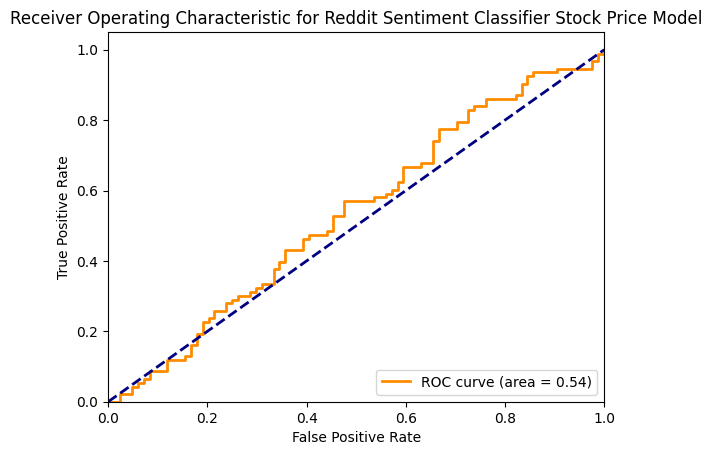

In [211]:
fpr, tpr, _ = roc_curve(labels, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Reddit Sentiment Classifier Stock Price Model')
plt.legend(loc="lower right")
plt.show()

In [212]:
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Mean Accuracy: 0.5253968253968255
